In [1]:
# !pip install nltk
import nltk
nltk.download
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('gutenberg')
nltk.download('shakesphere')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SREEJA.M\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SREEJA.M\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\SREEJA.M\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Error loading shakesphere: Package 'shakesphere' not found
[nltk_data]     in index


False

In [2]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
import pandas as pd
df = pd.read_csv("data.csv", encoding='latin')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# preprocessing the data ---> checking for null, NaN, and empty strings

In [5]:
df.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
pd.isnull(df).any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

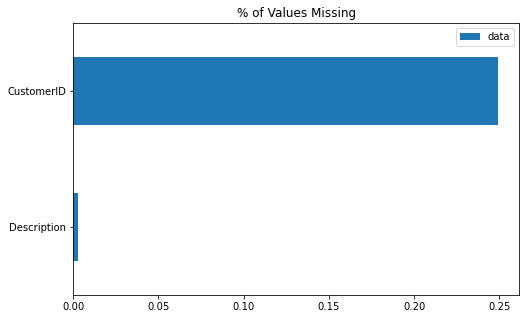

In [8]:
import matplotlib.pyplot as plt
ncounts = pd.DataFrame([df.isna().mean()]).T
ncounts = ncounts.rename(columns={0: "data"})

ncounts.query("data > 0").plot(
    kind="barh", figsize=(8, 5), title="% of Values Missing"
)
plt.show()

As we can see there are some missing values in columns Description(1,454) and CustomerID(1,35,080)
either drop the rows with null or empty values or impute the null values
as problem statement mentions "a model must take into account the similarity between the products purchased between the users (i.e. a user might purchase 2 different products which are very similar to each other)" which includes data of customer who purchased more than one product and find group of products that has similarity with in them and imputing null values is not a good choice as it is categorized and almost 20% data is missing I will choose to drop columns

In [9]:
(df['Description'].str.len()==0).any()
#there are no empty descriptions

False

In [10]:
nacols=["Description","CustomerID"]
df["n_missing"] = df[nacols].isna().sum(axis=1)

<AxesSubplot:title={'center':'Number of Missing Values per Sample'}>

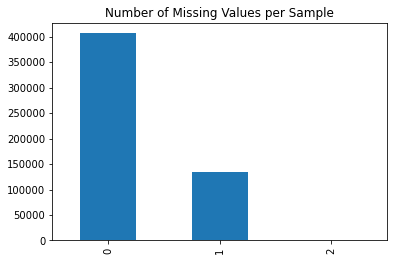

In [11]:
df["n_missing"].value_counts().plot(
    kind="bar", title="Number of Missing Values per Sample"
)

In [12]:
# I will have to drop the missing values/rows from the CustomerID
df.dropna(axis = 0, subset = ['CustomerID'], inplace = True)
print('Dataframe dimensions:', df.shape)

Dataframe dimensions: (406829, 9)


In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,n_missing
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0


In [14]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
n_missing      0
dtype: int64

As we droppped null values at axis of rows and we will check for duplicate values in a dataset column wise. Duplicates in your training set can cause your model to learn biases towards the duplicated samples which results in a model that will have a harder time generalizing to new data. Duplicates in your test set will result in incorrect performance evaluation of your model resulting in worse performance on unseen data.

In [15]:
df['Country'].duplicated().value_counts()

True     406792
False        37
Name: Country, dtype: int64

In [16]:
df['InvoiceNo'].duplicated().value_counts()

True     384639
False     22190
Name: InvoiceNo, dtype: int64

In [17]:
print(format(df.duplicated().sum()))


5225


In [18]:
df.drop_duplicates(inplace = True)

As far now the dataset is free from missing values and duplicate values 

In [19]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
n_missing      0
dtype: int64

# 1. getting the similar products using k_means cluster

To get similar products we have to go through the description column and extracting products name using NLP

In [20]:
import sys
sys.getfilesystemencoding()

'utf-8'

In [21]:
df.Description=df.Description.astype(str)

droping duplicates from Description column,
converting text to lower case,
removing stopwords, extra spaces, numbers, punctuations

In [22]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import string
def clean_msg(message,stemmer=PorterStemmer(),lemmatizer = WordNetLemmatizer(), stop_words=set(stopwords.words('english'))):
    PUNCT_TO_REMOVE = string.punctuation
    message = message.translate(str.maketrans(',', ',', PUNCT_TO_REMOVE))
    message = ''.join([i for i in message if not i.isdigit()])
    message = " ".join(message.split())
    words=word_tokenize(message.lower())
    filtered_words=[]
    lemmatized_words=[]
    for word in words:
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
            lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]  
    return lemmatized_words

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SREEJA.M\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


if there is an getting error saying that 'float' object has no attribute 'lower' means Description msg is considered as float type instead of considering it as string, Therefore converting the type of Description to string for doing so
-->df.dtypes
-->df.Description=df.Description.astype(str)

In [23]:
nested_list = df['Description'].apply(clean_msg)
df['stop_words_removed_Des'] = nested_list

In [24]:
lemmatizer = WordNetLemmatizer()
tokens = nested_list
lemmatized_sentences=[]
for x in tokens:
    lemmatized_sentences.append((" ".join(x)))
lemmatized_sentences

['white hang heart tlight holder',
 'white metal lantern',
 'cream cupid heart coat hanger',
 'knit union flag hot water bottl',
 'red woolli hotti white heart',
 'set babushka nest box',
 'glass star frost tlight holder',
 'hand warmer union jack',
 'hand warmer red polka dot',
 'assort colour bird ornament',
 'poppi playhous bedroom',
 'poppi playhous kitchen',
 'feltcraft princess charlott doll',
 'ivori knit mug cosi',
 'box assort colour teaspoon',
 'box vintag jigsaw block',
 'box vintag alphabet block',
 'home build block word',
 'love build block word',
 'recip box metal heart',
 'doormat new england',
 'jam make set jar',
 'red coat rack pari fashion',
 'yellow coat rack pari fashion',
 'blue coat rack pari fashion',
 'bath build block word',
 'alarm clock bakelik pink',
 'alarm clock bakelik red',
 'alarm clock bakelik green',
 'panda bunni sticker sheet',
 'star gift tape',
 'inflat polit globe',
 'vintag head tail card game',
 'set red retrospot tea towel',
 'round snack bo

In [25]:
df['lemmatized_sentences'] = lemmatized_sentences

In [26]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,n_missing,stop_words_removed_Des,lemmatized_sentences
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0,"[white, hang, heart, tlight, holder]",white hang heart tlight holder
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,"[white, metal, lantern]",white metal lantern
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0,"[cream, cupid, heart, coat, hanger]",cream cupid heart coat hanger
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,"[knit, union, flag, hot, water, bottl]",knit union flag hot water bottl
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,"[red, woolli, hotti, white, heart]",red woolli hotti white heart


checking for duplicates in Description column

In [27]:
Description_dupr = df['lemmatized_sentences']

In [28]:
Description_dupr.duplicated().value_counts()

True     397818
False      3786
Name: lemmatized_sentences, dtype: int64

In [29]:
Description_dupr.drop_duplicates(inplace = True)

In [30]:
Description_dupr.duplicated().any()

False

In [31]:
Description_dupr=Description_dupr.str.replace("[^a-zA-z]" ," ")
Description_dupr.shape

C:\Users\SREEJA.M\AppData\Local\Temp/ipykernel_2060/3477770368.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Description_dupr=Description_dupr.str.replace("[^a-zA-z]" ," ")


(3786,)

In [32]:
list1 = df['lemmatized_sentences'].apply(clean_msg)

In [33]:
df1=df['lemmatized_sentences'].drop_duplicates()
df1=pd.DataFrame(df1)
df1=df1.reset_index(drop=True)
df1

,lemmatized_sentences
0,white hang heart tlight holder
1,white metal lantern
2,cream cupid heart coat hanger
3,knit union flag hot water bottl
4,red woolli hotti white heart
...,...
3781,letter w bling key ring
3782,letter z bling key ring
3783,pink crystal skull phone charm
3784,cream hang heart tlight holder


In [34]:
df1.isna().sum()

lemmatized_sentences    0
dtype: int64

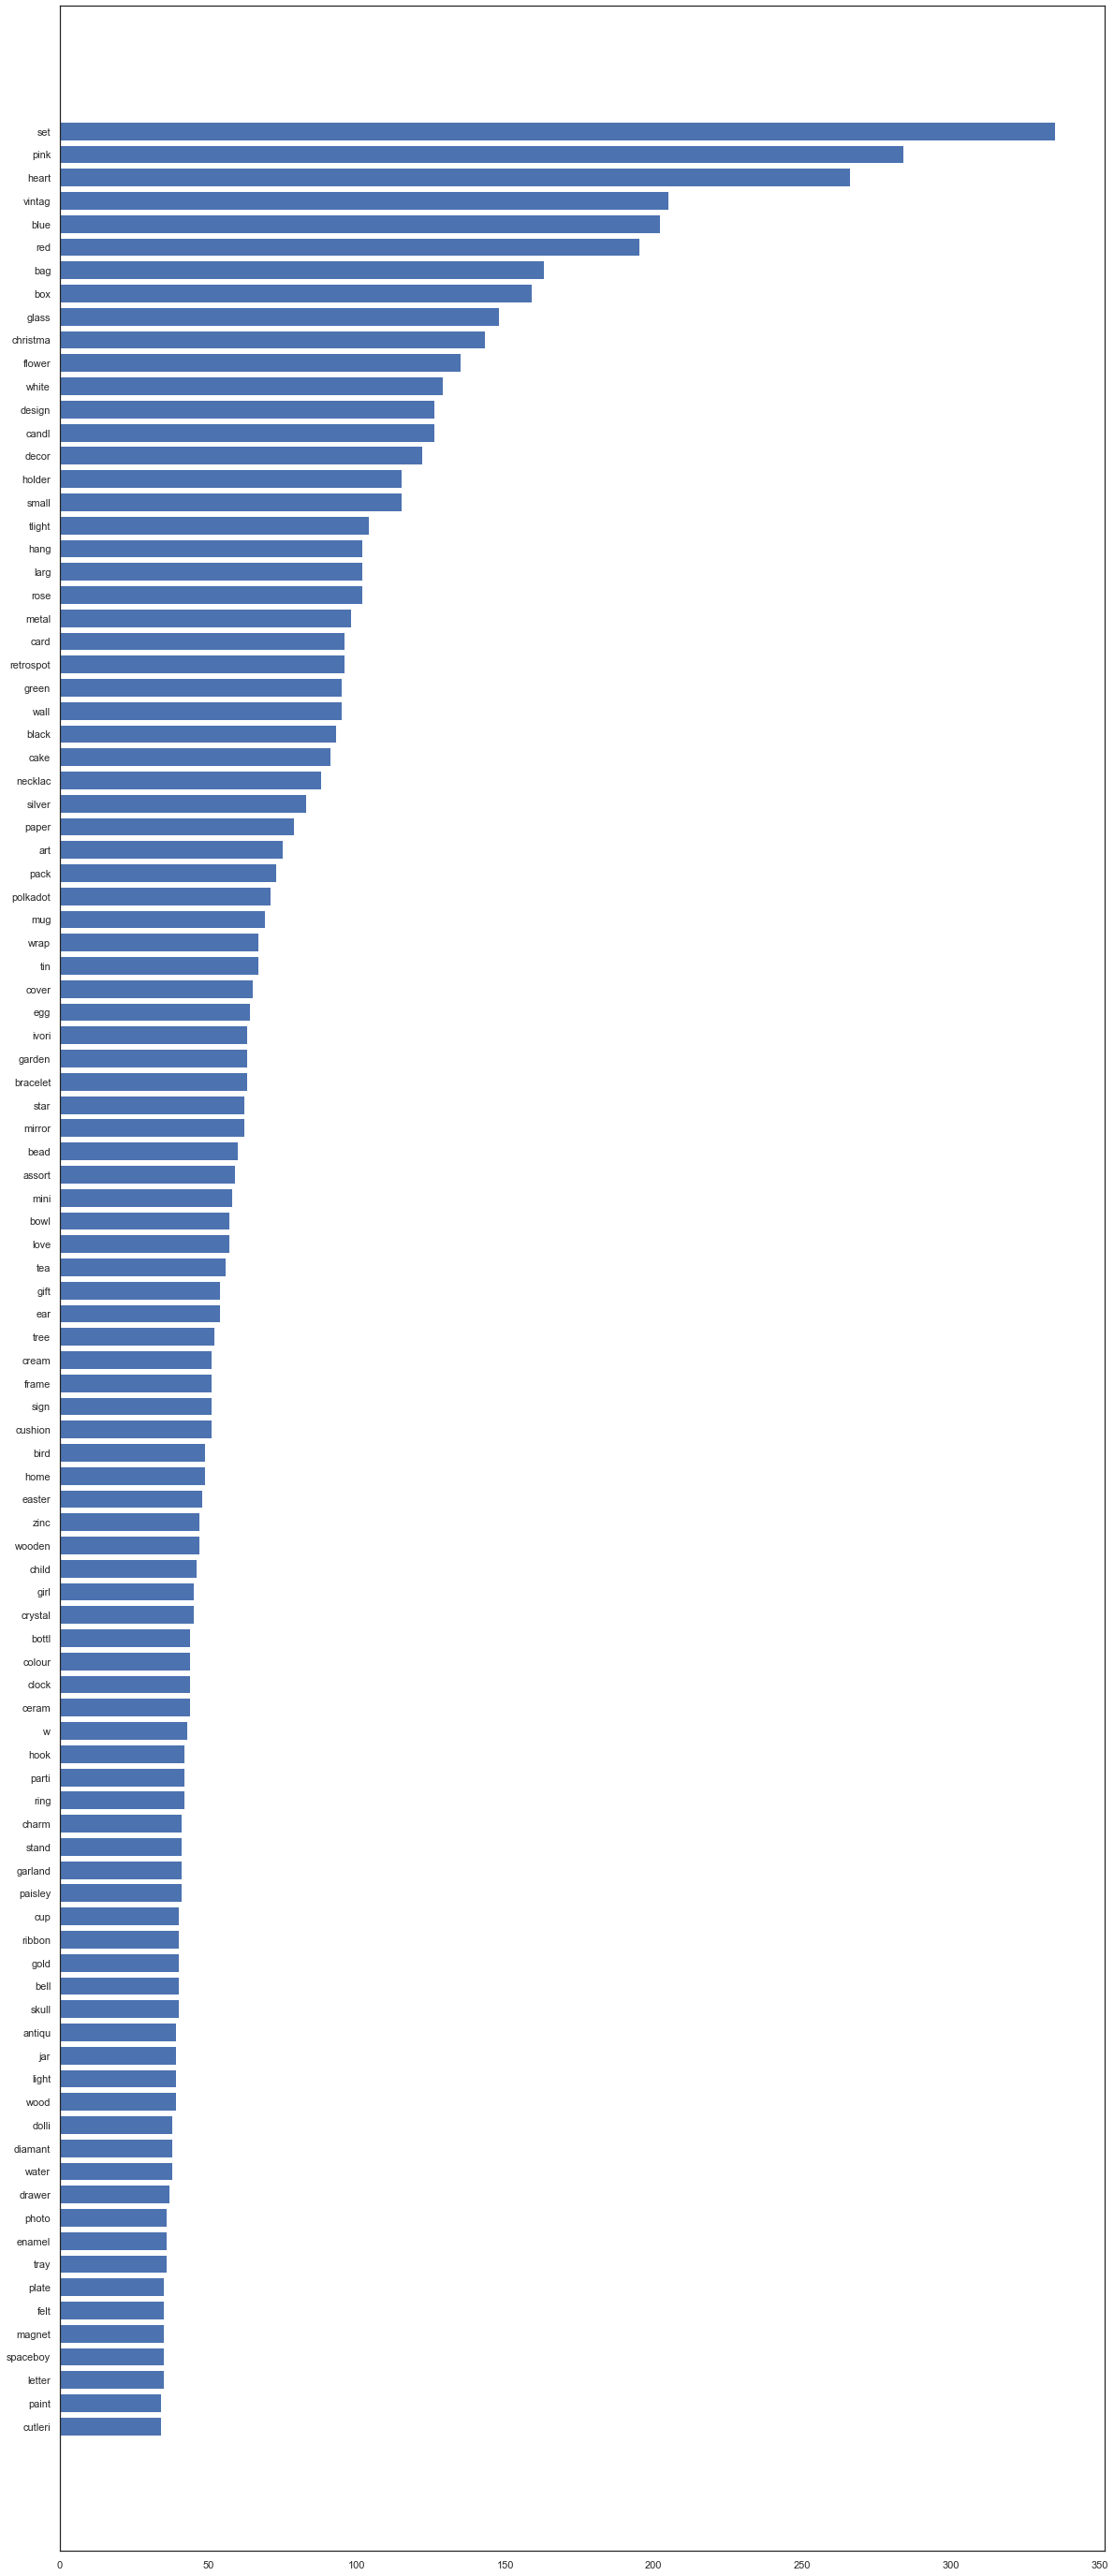

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data


#Extracts words into list and count frequency
all_words = ' '.join([text for text in df1['lemmatized_sentences']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n =100) 

words_df.sort_values('count',inplace = True)
words_df

# Plotting 30 frequent words
plt.figure(figsize=(20,50))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

# using Bag_of_words we are converting words to categories/numerical

Bag of Words
In Bag of Words model Count Vectoriser frequency model is used to get values 

importing count vectorizer from sklearn.feature_extraction.text, default tokens will removed automatically, creating bag of words model, using model creating a dataframe

In [36]:
#count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(binary=False)
count_values = count_vectorizer.fit_transform(df1['lemmatized_sentences']).toarray()
feature_names = count_vectorizer.get_feature_names()
df2_count=pd.DataFrame(count_values, columns = feature_names)
df2_count

,abc,abstract,acapulco,account,acryl,address,ade,adult,advent,afghan,...,xma,xxcm,yellow,yellowblu,yelloworang,yellowpink,your,yuletid,zinc,zincglass
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# instead of count vectorizer we can make a sparse matrix that simply gives 0 or 1 to specify whether word is there or not

# k_means algorithm

#Specify number of clusters K.
#Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without #replacement.
#Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.
#Compute the sum of the squared distance between data points and all centroids.
#Assign each data point to the closest cluster (centroid).
#Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.

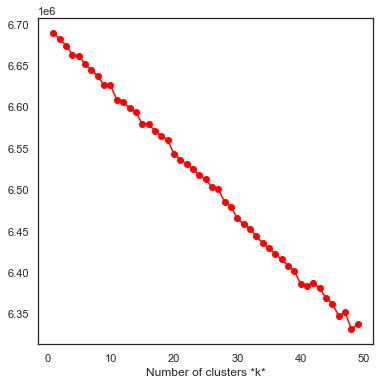

In [78]:
#for k means clustering scaling the data is mandatory 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scale=StandardScaler()
X=scale.fit_transform(df2_count.values)
inertias = []
list_k = list(range(1,50))
from sklearn.cluster import KMeans
for k in list_k:
    km = KMeans(n_clusters=k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X)
    inertias.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertias, '-o',color='red')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('');

In [79]:
km.cluster_centers_

array([[-0.02299002, -0.02816064, -0.03984095, ..., -0.02299002,
        -0.11211693, -0.01625425],
       [-0.02299002, -0.02816064, -0.03984095, ..., -0.02299002,
        -0.11211693, -0.01625425],
       [-0.02299002, -0.02816064, -0.03984095, ..., -0.02299002,
        -0.11211693, -0.01625425],
       ...,
       [-0.02299002, -0.02816064, -0.03984095, ..., -0.02299002,
        -0.11211693, -0.01625425],
       [-0.02299002, -0.02816064, -0.03984095, ..., -0.02299002,
        -0.11211693, -0.01625425],
       [-0.02299002, -0.02816064, -0.03984095, ..., -0.02299002,
        -0.11211693, -0.01625425]])

In [72]:
print(min(inertias))

6340312.21344662


# choosing the K_value
the point where we can feel ourselves okay is called “elbow point”. When you plot the Total Distance (Inertia ) vs. K-Value graph, you will observe that after a point, total distance will start changing insignificantly compared to previous changes. At this point we can conclude that the data points are clustered sufficiently and further clustering will not contribute more information to our system. Thus, we can choose to stop here and proceed with the K-value corresponding to elbow point.

As we can see there is a change we can observe slight change between 10 and 15 and 20 and 30 after these points we can observe that after 30 there is no change

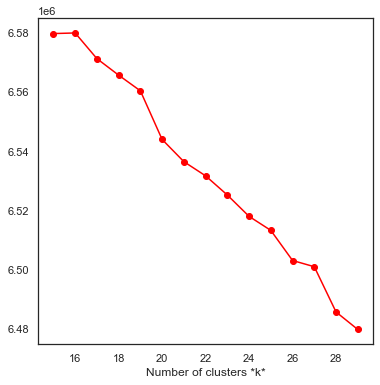

In [80]:
#for k means clustering scaling the data is mandatory 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scale=StandardScaler()
X=scale.fit_transform(df2_count.values)
inertias = []
list_k = list(range(15,30))
from sklearn.cluster import KMeans
for k in list_k:
    km = KMeans(n_clusters=k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X)
    inertias.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertias, '-o',color='red')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('');

In [75]:
print(min(inertias.iloc()))

6479353.978538547


As, I have observed the change started 24-26 considering 25

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
km = KMeans(n_clusters=25) 
km.fit(X) 
centroids = km.cluster_centers_

In [40]:
km.inertia_

6500258.498989904

In [41]:
km.labels_
#it tell us each data which group belongs to

array([14, 14, 14, ..., 14, 14, 14])

In [42]:
df2=pd.DataFrame(km.labels_,columns=['Group_no'],index=None)
df2

,Group_no
0,14
1,14
2,14
3,7
4,14
...,...
3781,14
3782,14
3783,14
3784,14


In [43]:
df3=pd.concat([df1,df2],axis=1)
df3

,lemmatized_sentences,Group_no
0,white hang heart tlight holder,14
1,white metal lantern,14
2,cream cupid heart coat hanger,14
3,knit union flag hot water bottl,7
4,red woolli hotti white heart,14
...,...,...
3781,letter w bling key ring,14
3782,letter z bling key ring,14
3783,pink crystal skull phone charm,14
3784,cream hang heart tlight holder,14


In [44]:
df4=pd.merge(df,df3,how='left', on='lemmatized_sentences')

In [45]:
df4

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,n_missing,stop_words_removed_Des,lemmatized_sentences,Group_no
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0,"[white, hang, heart, tlight, holder]",white hang heart tlight holder,14
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,"[white, metal, lantern]",white metal lantern,14
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0,"[cream, cupid, heart, coat, hanger]",cream cupid heart coat hanger,14
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,"[knit, union, flag, hot, water, bottl]",knit union flag hot water bottl,7
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,"[red, woolli, hotti, white, heart]",red woolli hotti white heart,14
...,...,...,...,...,...,...,...,...,...,...,...,...
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,0,"[pack, spaceboy, napkin]",pack spaceboy napkin,14
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,0,"[child, apron, dolli, girl]",child apron dolli girl,14
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,0,"[child, cutleri, dolli, girl]",child cutleri dolli girl,14
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,0,"[child, cutleri, circu, parad]",child cutleri circu parad,16


In [46]:
df5=df4.drop(['InvoiceNo','stop_words_removed_Des','lemmatized_sentences','StockCode','InvoiceDate','Description'],axis=1)

In [47]:
df5

,Quantity,UnitPrice,CustomerID,Country,n_missing,Group_no
0,6,2.55,17850.0,United Kingdom,0,14
1,6,3.39,17850.0,United Kingdom,0,14
2,8,2.75,17850.0,United Kingdom,0,14
3,6,3.39,17850.0,United Kingdom,0,7
4,6,3.39,17850.0,United Kingdom,0,14
...,...,...,...,...,...,...
401599,12,0.85,12680.0,France,0,14
401600,6,2.10,12680.0,France,0,14
401601,4,4.15,12680.0,France,0,14
401602,4,4.15,12680.0,France,0,16


In [48]:
df6=pd.concat([df5, pd.get_dummies(df5["Group_no"])],axis=1)
df6

,Quantity,UnitPrice,CustomerID,Country,n_missing,Group_no,0,1,2,3,...,15,16,17,18,19,20,21,22,23,24
0,6,2.55,17850.0,United Kingdom,0,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,3.39,17850.0,United Kingdom,0,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,2.75,17850.0,United Kingdom,0,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,3.39,17850.0,United Kingdom,0,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,3.39,17850.0,United Kingdom,0,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401599,12,0.85,12680.0,France,0,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
401600,6,2.10,12680.0,France,0,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
401601,4,4.15,12680.0,France,0,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
401602,4,4.15,12680.0,France,0,16,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [49]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
Encode_coun=en.fit_transform(df6['Country'])
df7=pd.DataFrame(Encode_coun,columns=['Encode_coun'])
#df7=pd.get_dummies(df6['Country'])
df7

,Encode_coun
0,35
1,35
2,35
3,35
4,35
...,...
401599,13
401600,13
401601,13
401602,13


In [50]:
df8=pd.concat([df6,df7],axis=1)
df8=df8.dropna()
df8.CustomerID = df8.CustomerID.astype(int)
df8=df8.drop(columns=['Country','Group_no'])
df8

,Quantity,UnitPrice,CustomerID,n_missing,0,1,2,3,4,5,...,16,17,18,19,20,21,22,23,24,Encode_coun
0,6,2.55,17850,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35
1,6,3.39,17850,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35
2,8,2.75,17850,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35
3,6,3.39,17850,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35
4,6,3.39,17850,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401599,12,0.85,12680,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
401600,6,2.10,12680,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
401601,4,4.15,12680,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
401602,4,4.15,12680,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,13


Based on customer id we are taking the mean value of all those columns

In [51]:
df9=df8.groupby('CustomerID').mean()
df9=df9.reset_index(drop=True)
df9

,Quantity,UnitPrice,n_missing,0,1,2,3,4,5,6,...,16,17,18,19,20,21,22,23,24,Encode_coun
0,0.000000,1.040000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,35.0
1,13.505495,2.644011,0.0,0.016484,0.0,0.027473,0.005495,0.0,0.0,0.0,...,0.000000,0.0,0.005495,0.0,0.0,0.0,0.0,0.0,0.0,16.0
2,75.516129,5.764839,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.161290,0.0,0.0,0.0,0.0,0.0,0.0,12.0
3,8.643836,8.289041,0.0,0.000000,0.0,0.027397,0.000000,0.0,0.0,0.0,...,0.013699,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,18.0
4,11.588235,3.841176,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,4.500000,4.765000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,35.0
4368,7.714286,5.622857,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.142857,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,35.0
4369,7.538462,4.821538,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,35.0
4370,1.882108,1.628752,0.0,0.000000,0.0,0.011096,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.001387,0.0,0.0,0.0,0.0,0.0,0.0,35.0


when we do groupby with customerid first it will sort the dataframe based on customer id and take the mean value so we are creating another dataframe which sorts the customer id and droped duplicate values because when we are going to merge those two dataframe order of cus id and their values will be maintained correctly

In [52]:
df10=df8['CustomerID'].sort_values()
df10=df10.drop_duplicates()
df10=df10.reset_index(drop=True)
df10

0       12346
1       12347
2       12348
3       12349
4       12350
        ...  
4367    18280
4368    18281
4369    18282
4370    18283
4371    18287
Name: CustomerID, Length: 4372, dtype: int32

In [53]:
df11=pd.concat([df10,df9],axis=1)
df11

,CustomerID,Quantity,UnitPrice,n_missing,0,1,2,3,4,5,...,16,17,18,19,20,21,22,23,24,Encode_coun
0,12346,0.000000,1.040000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,35.0
1,12347,13.505495,2.644011,0.0,0.016484,0.0,0.027473,0.005495,0.0,0.0,...,0.000000,0.0,0.005495,0.0,0.0,0.0,0.0,0.0,0.0,16.0
2,12348,75.516129,5.764839,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.161290,0.0,0.0,0.0,0.0,0.0,0.0,12.0
3,12349,8.643836,8.289041,0.0,0.000000,0.0,0.027397,0.000000,0.0,0.0,...,0.013699,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,18.0
4,12350,11.588235,3.841176,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280,4.500000,4.765000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,35.0
4368,18281,7.714286,5.622857,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.142857,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,35.0
4369,18282,7.538462,4.821538,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,35.0
4370,18283,1.882108,1.628752,0.0,0.000000,0.0,0.011096,0.000000,0.0,0.0,...,0.000000,0.0,0.001387,0.0,0.0,0.0,0.0,0.0,0.0,35.0


In [54]:
df11['CustomerID'].isna().sum()

0

# 2.Getting similar customers using k_means clustering

In [55]:
val=df11.values

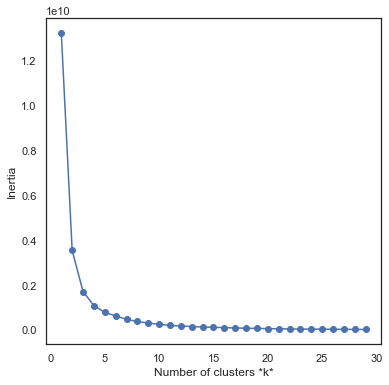

In [56]:
inertias = []
list_k = list(range(1,30))
from sklearn.cluster import KMeans
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(val)
    inertias.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia');

In [57]:
km = KMeans(n_clusters=6,init='k-means++') 
km.fit(val)

KMeans(n_clusters=6)

In [58]:
km.inertia_

644607325.7904289

In [59]:
customer_group=pd.DataFrame(km.labels_,columns=['customer_Group'])
customer_group

,customer_Group
0,1
1,1
2,1
3,1
4,1
...,...
4367,0
4368,0
4369,0
4370,0


In [60]:
customer_group1=pd.concat([df11['CustomerID'],customer_group],axis=1)
customer_group1

,CustomerID,customer_Group
0,12346,1
1,12347,1
2,12348,1
3,12349,1
4,12350,1
...,...,...
4367,18280,0
4368,18281,0
4369,18282,0
4370,18283,0


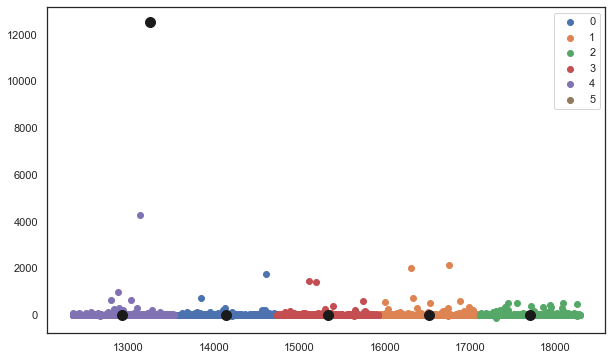

In [61]:
#Getting the Centroids
import numpy as np
centroids = km.cluster_centers_
label=km.fit_predict(val)
labels = np.unique(label)
 
#plotting the results:

plt.figure(figsize=(10, 6)) 
for i in labels:
    plt.scatter(val[label == i , 0] , val[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k')
plt.legend()
plt.show()

No handles with labels found to put in legend.


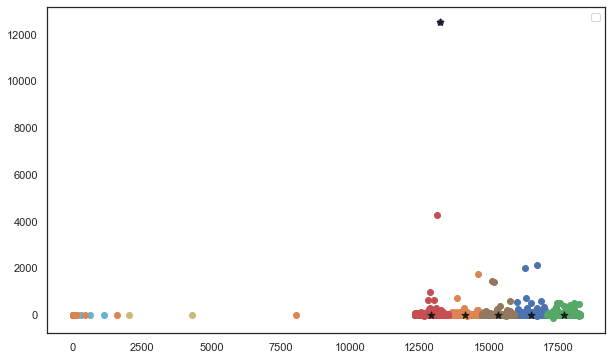

In [62]:
import numpy as np
centroids = km.cluster_centers_
label=km.fit_predict(val)
labels = np.unique(label)
 
#plotting the results:

plt.figure(figsize=(10,6)) 
for i in range(0,24,2):
    plt.scatter(val[label == 0 , i] , val[label == 0 , (i+1)] )
    plt.scatter(val[label == 1 , i] , val[label == 1 , (i+1)] )
    plt.scatter(val[label == 2 , i] , val[label == 2 , (i+1)] )
    plt.scatter(val[label == 3 , i] , val[label == 3 , (i+1)] )
    plt.scatter(val[label == 4 , i] , val[label == 4 , (i+1)] )
    plt.scatter(val[label == 5 , i] , val[label == 5 , (i+1)] )
plt.scatter(centroids[:,0] , centroids[:,1] , s = 52,marker='*', color = 'k')
plt.legend()
plt.show()

In [83]:
customer_group1

,CustomerID,customer_Group
0,12346,1
1,12347,1
2,12348,1
3,12349,1
4,12350,1
...,...,...
4367,18280,0
4368,18281,0
4369,18282,0
4370,18283,0
